In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
df=pd.read_csv('Customer Churn.csv')

In [17]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [19]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [29]:
df['TotalCharges']=df['TotalCharges'].replace(" ","0")
df['TotalCharges']=df['TotalCharges'].astype("float")
df.info

<bound method DataFrame.info of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL 

In [23]:
df.shape

(7043, 21)

In [25]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [33]:
df.isnull().sum().sum()

0

In [37]:
#check for duplicates
df['customerID'].duplicated().sum()

0

In [39]:
#convert binary variables
def conv(value):
    if value==1:
        return 'yes'
    else:
        return 'no'
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df.head()
        

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


C:\Users\sneha\AppData\Local\Temp\ipykernel_7040\3077570098.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax=sns.countplot(x='Churn',data=df,palette='twilight')


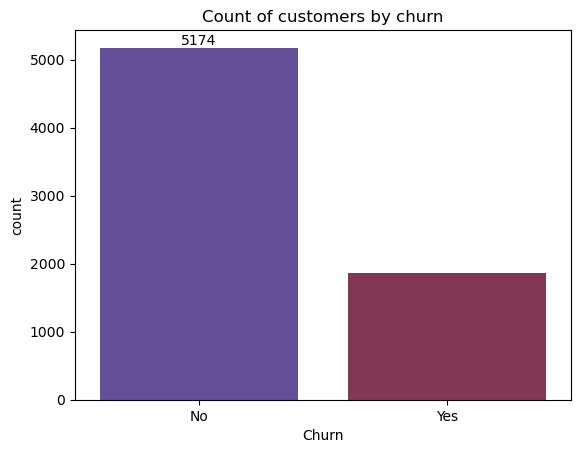

In [99]:
#Visualization

ax=sns.countplot(x='Churn',data=df,palette='twilight')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by churn")
plt.show()
          

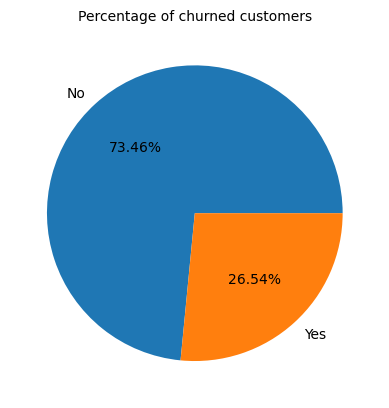

In [51]:
#Churn percentage pie chart
gb=df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'],labels=gb.index,autopct='%1.2f%%')
plt.title("Percentage of churned customers",fontsize=10)
plt.show()

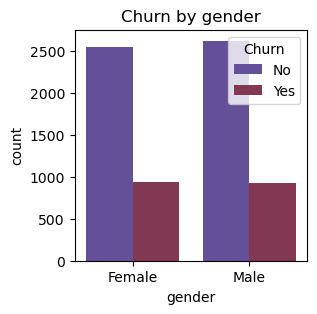

In [97]:
plt.figure(figsize=(3,3))
sns.countplot(x='gender',data=df,hue='Churn',palette='twilight')
plt.title("Churn by gender")
plt.show()

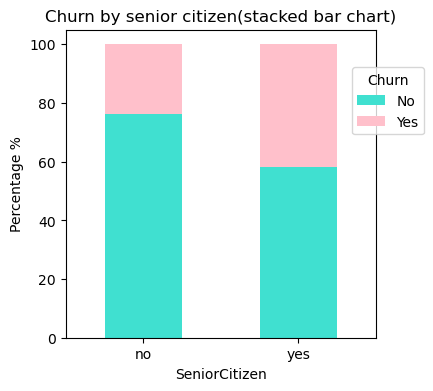

In [95]:
total_counts=df.groupby('SeniorCitizen')['Churn'].value_counts(normalize=True).unstack()*100
fig,ax=plt.subplots(figsize=(4,4))
total_counts.plot(kind='bar',stacked=True,ax=ax,color=['turquoise','pink'])
plt.title('Churn by senior citizen(stacked bar chart)')
plt.xlabel('SeniorCitizen')
plt.ylabel('Percentage %')
plt.xticks(rotation=0)
plt.legend(title='Churn',bbox_to_anchor=(0.9,0.9))
plt.show()

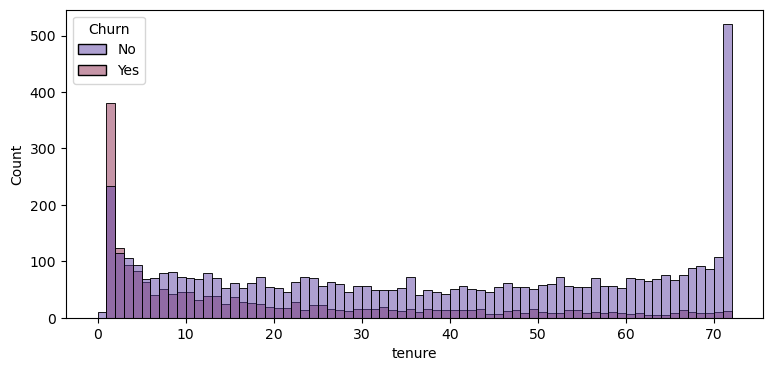

In [81]:
#Churn by tenure
plt.figure(figsize=(9,4))
sns.histplot(x='tenure',data=df,bins=72,hue='Churn',palette='twilight')
plt.show()

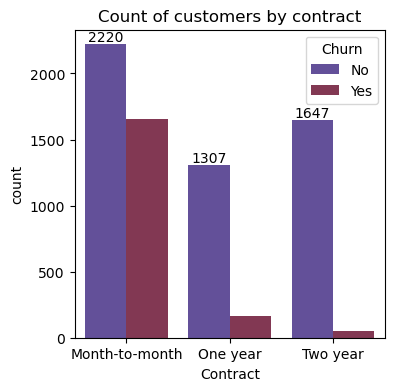

In [91]:
#Contact type
plt.figure(figsize=(4,4))
ax=sns.countplot(x='Contract',data=df,hue='Churn',palette='twilight')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by contract")
plt.show()

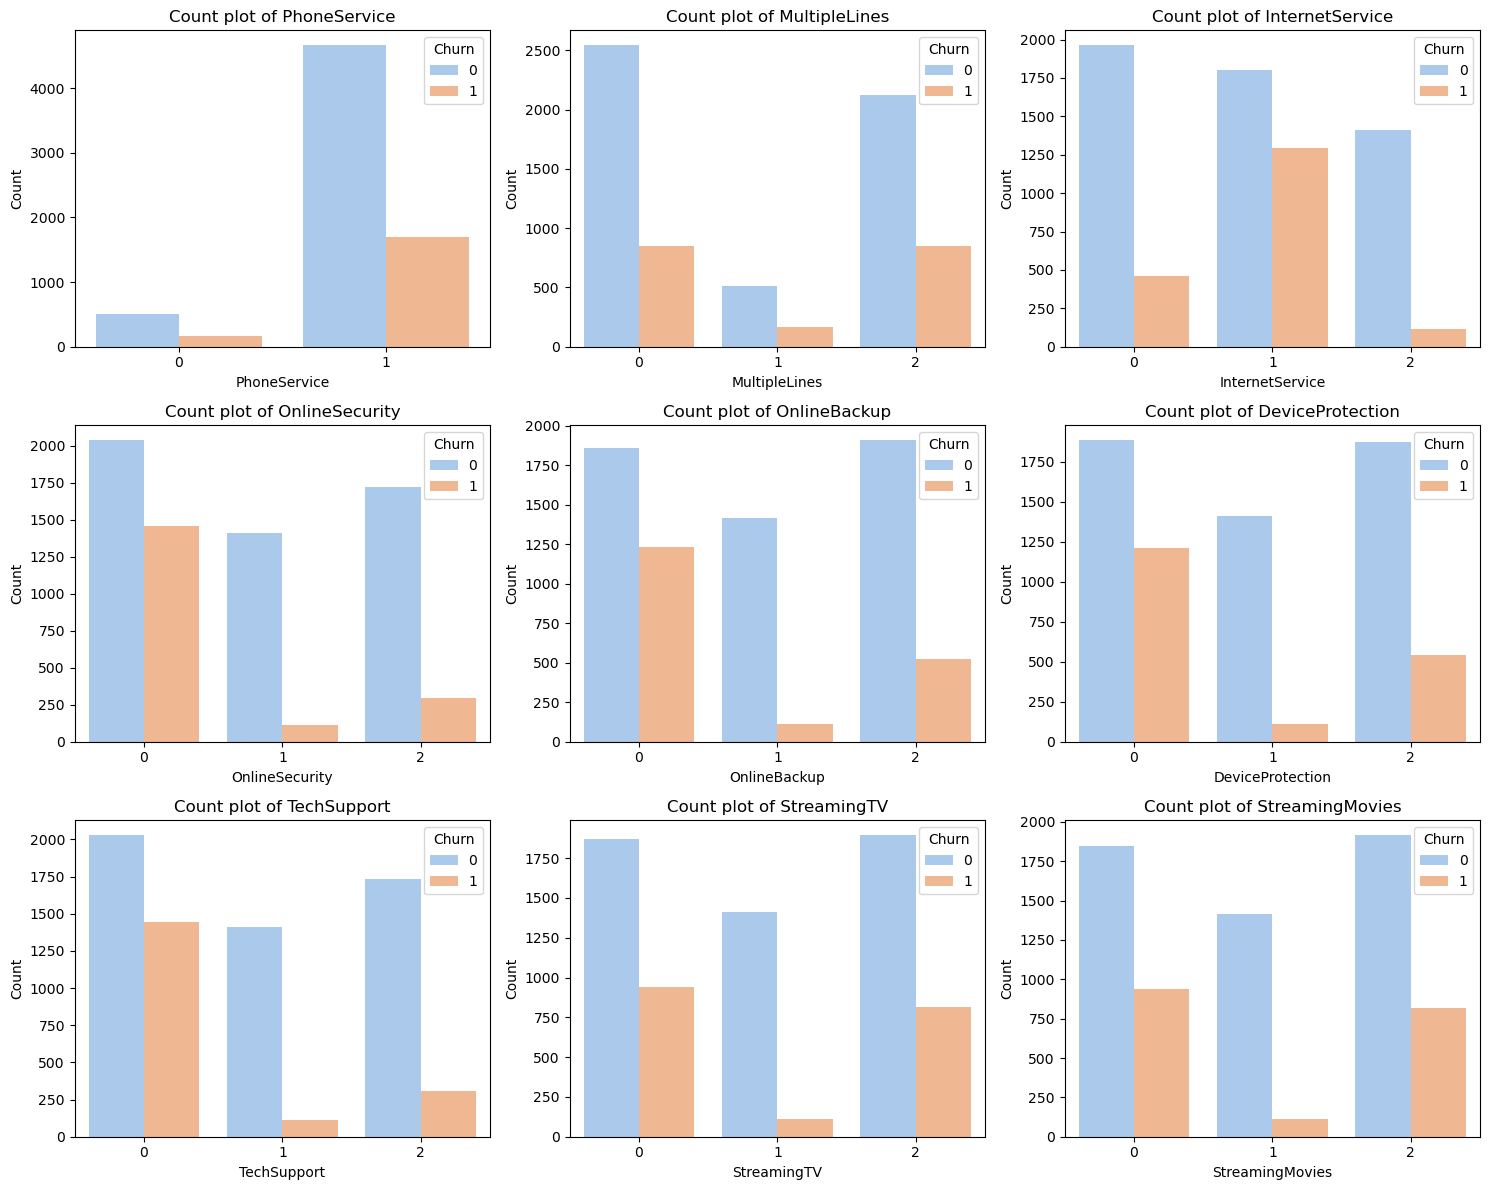

In [131]:
#Churn by service usage
columns=['PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies']
n_cols=3
n_rows=(len(columns) + n_cols-1) // n_cols

fig,axes=plt.subplots(n_rows,n_cols,figsize=(15,n_rows*4))
axes=axes.flatten()

for i,col in enumerate(columns):
    sns.countplot(x=col,data=df,ax=axes[i],hue=df["Churn"],palette='pastel')
    axes[i].set_title(f'Count plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')
for j in range (i+1,len(axes)):
    fig.delaxes(axes[j])
plt.tight_layout()
plt.show()

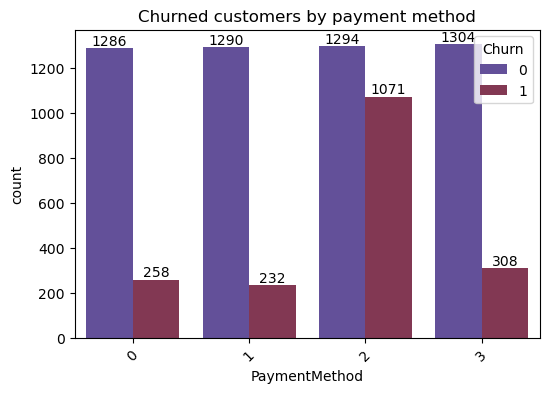

In [129]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue='Churn',palette='twilight')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned customers by payment method")
plt.xticks(rotation=45)
plt.show()

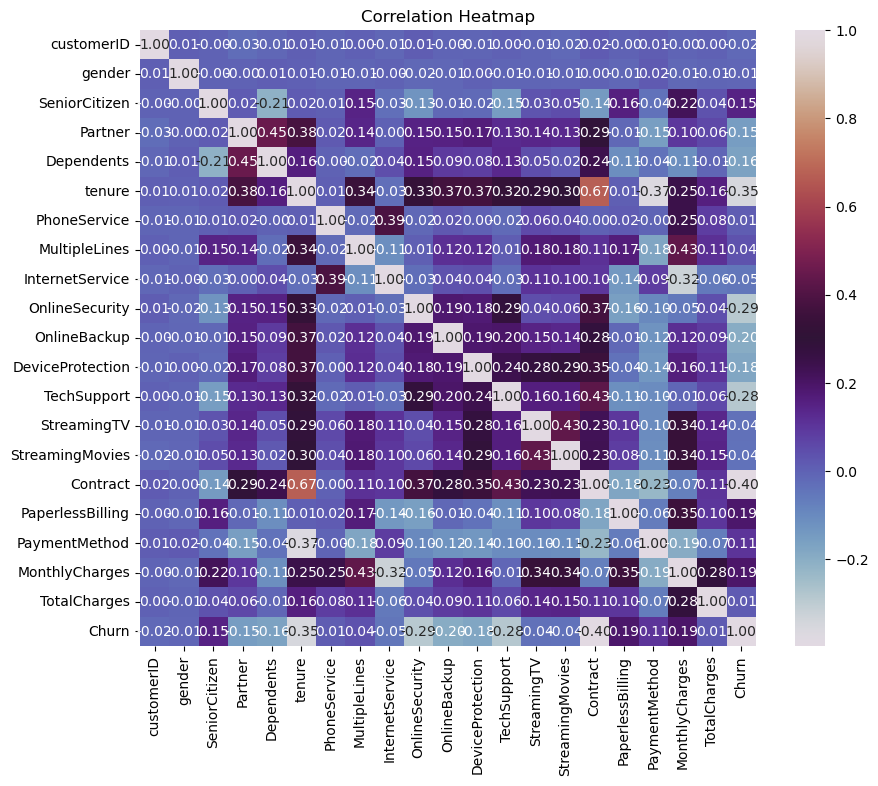

In [125]:
df=pd.get_dummies(df,drop_first=True)

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

df= pd.read_csv('Customer Churn.csv')

label_encoders={}
for column in df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le

correlation_matrix=df.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cmap='twilight',square=True)
plt.title("Correlation Heatmap")
plt.show()



C:\Users\sneha\AppData\Local\Temp\ipykernel_7040\2956716605.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance',y='Feature',data=importance_df,palette='Set3')


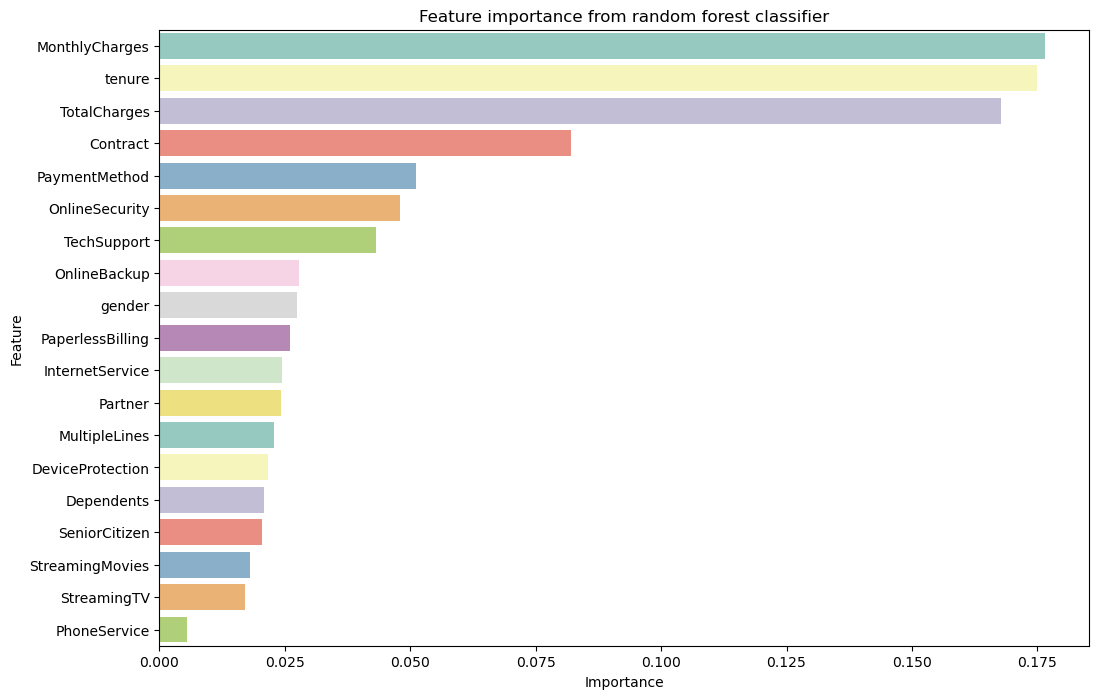

In [173]:
#Feature importance using random forest
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder

#Encode categorical variables
label_encoders={}
for column in df.select_dtypes(include=['object']).columns:
    le=LabelEncoder()
    df[column]=le.fit_transform(df[column])
    label_encoders[column]=le
    
#split data into features and target variables  
X=df.drop(columns=['customerID','Churn'])
y=df['Churn']

#Splitting dataset into training and test sets
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

#Fit random forest classifier
rf_model=RandomForestClassifier(n_estimators=100,random_state=42)
rf_model.fit(X_train,y_train)

#feature importance
importances=rf_model.feature_importances_
feature_names=X.columns
importance_df=pd.DataFrame({'Feature':feature_names,'Importance':importances}).sort_values(by='Importance',ascending=False)

#plot feature importance
plt.figure(figsize=(12,8))
sns.barplot(x='Importance',y='Feature',data=importance_df,palette='Set3')
plt.title("Feature importance from random forest classifier")
plt.show()


C:\Users\sneha\AppData\Local\Temp\ipykernel_7040\2784323477.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Churn',y='MonthlyCharges',data=df,palette='twilight')


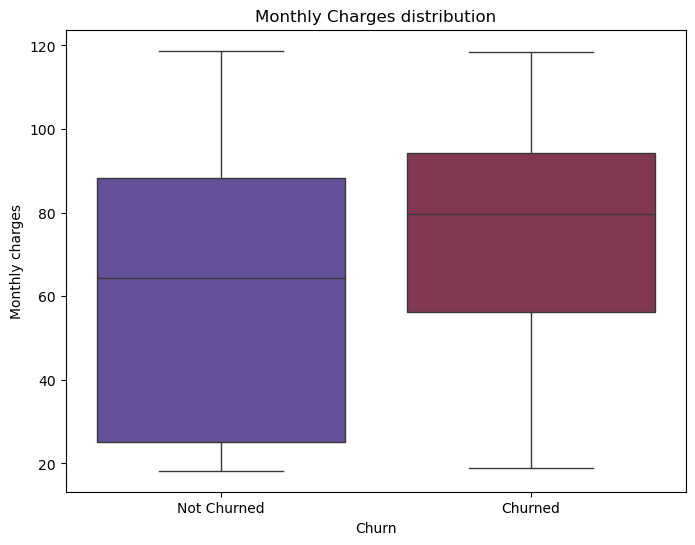

In [163]:
#Monthly charges vs churn analysis
plt.figure(figsize=(8,6))
sns.boxplot(x='Churn',y='MonthlyCharges',data=df,palette='twilight')
plt.title("Monthly Charges distribution")
plt.xlabel("Churn")
plt.ylabel("Monthly charges")
plt.xticks([0,1],['Not Churned','Churned'])
plt.show()